## age distribution（拿到运营json即可用）

total: 994626


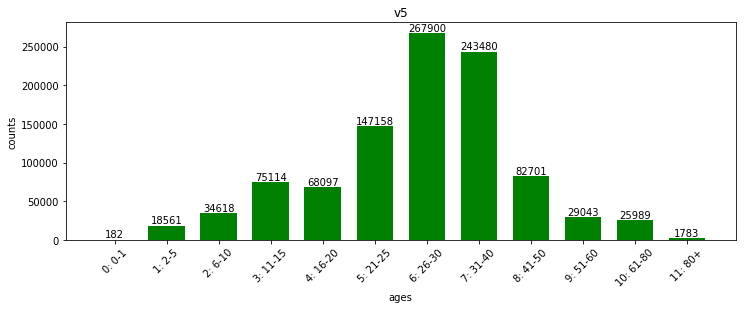

total: 425852


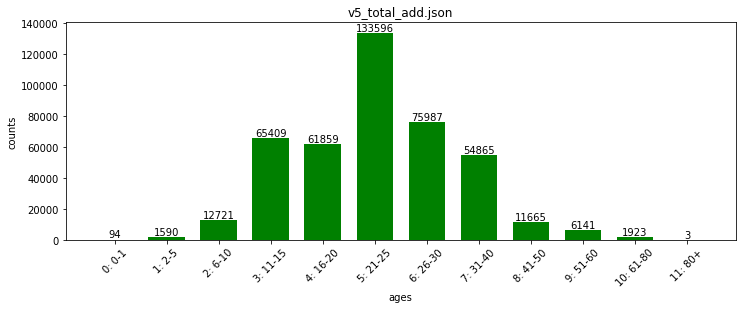

total: 479460


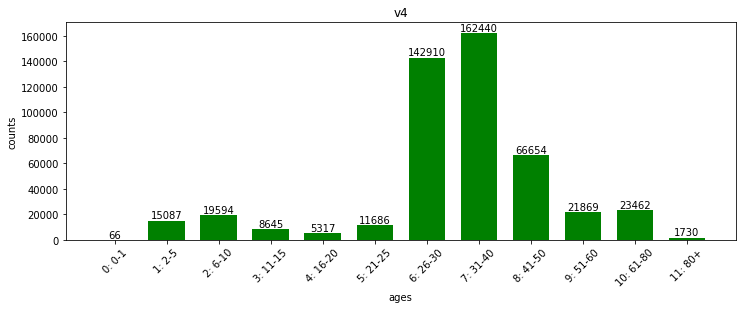

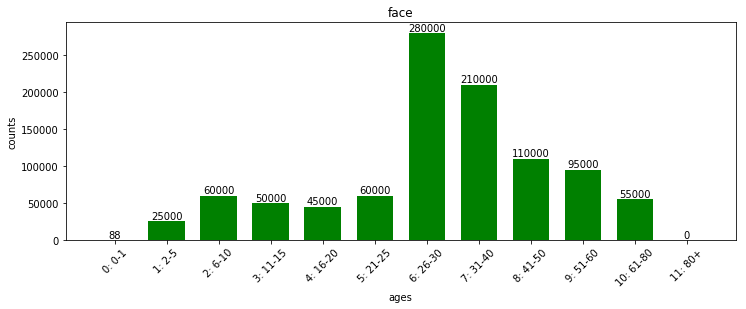

In [79]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import json
import ipdb

def get_labels(path):
    label_lst = []
    age_scope = ["0: 0-1", "1: 2-5", "2: 6-10", "3: 11-15", 
               "4: 16-20", "5: 21-25", "6: 26-30", "7: 31-40", 
               "8: 41-50", "9: 51-60", "10: 61-80", "11: 80+"]
    scope_cnt = [0] * 12
    scope_cnt[11] += 1
    
    if isinstance(path, list):
        recs = []
        for p in path:
            recs += open(p, "r").readlines()
    elif "labels2imgs" in path:
        f = open(path, "r")
        obj = json.load(f)
        for label, imgs in obj.items():
            scope_cnt[int(label)] = len(imgs)
            label_lst.extend([1]*len(imgs))
    else:
        recs = open(path, "r").readlines()
        for line in recs:
            if "data-c9" in path: # source data path 
                if len(line)<40:continue
                label = int(line.split("\t")[1])
            else:
                if "points" in line:
                    label = int(line.split("\t")[1])
                else:
                    label = int(line.split(" ")[1])
            if label in [11, 13]:continue
            age_mapping = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 12:6, 6:7, 7:8, 8:9, 9:10, 10:11}
            label = age_mapping[label]
            scope_cnt[label] += 1
            label_lst.append(label)
    print("total: %s"%len(label_lst))
#     print("distribution: %s"%dict(zip(age_scope, scope_cnt)))
    return age_scope, scope_cnt

def age_distribution(dataset_name, age_scope, scope_cnt):
    plt.figure(figsize=(12,4))
    num_bins = 12
#     n, bins, patches = plt.hist(x, num_bins, normed=False, facecolor = 'blue', alpha = 0.3)
    plt.bar(age_scope, scope_cnt, width=0.7, color="green", align="center")
    for a, b in zip(age_scope, scope_cnt):
        plt.text(a, b+0.5, '%.0f' % b, ha='center', va='bottom', fontsize=10)
    plt.xticks(range(len(age_scope)), age_scope, rotation=45)
    plt.xlabel('ages')
    plt.ylabel('counts')
    plt.title(dataset_name)
    plt.show()

task="age"
# path = ["/world/data-c26/liliang/person_attribute/v5/lst/%s/source/train_keypoints_before_v5.json"%task,
#         "/world/data-c26/liliang/person_attribute/v5/lst/%s/source/train_keypoints_v5.json"%task,
#        "/world/data-c26/liliang/person_attribute/v5/lst/%s/source/v5_anta1_11-25_filtercam.json"%task,
#         "/world/data-c26/liliang/person_attribute/v5/lst/%s/source/v5_anta2_11-25_filtercam.json"%task,
#         "/world/data-c26/liliang/person_attribute/v5/lst/%s/source/v5_anta3_11-25_filtercam.json"%task,
#        "/world/data-c26/liliang/person_attribute/v5/lst/%s/train_keypoints.json"%task,
#        "/world/data-c26/liliang/person_attribute/v5/train/%s/labels2imgs.json"%task]
# path = ["/world/data-c26/xiaoyouchang/person_attribute/v3/test/age/labels2imgs.json"]
path = [
           "/world/data-c26/liliang/person_attribute/v5/train/%s/labels2imgs.json"%task,
#         "/world/data-c26/liliang/person_attribute/v5/lst/%s/source/train_keypoints_before_v5.json"%task,
#     "/world/data-c26/liliang/person_attribute/v5/lst/%s/source/v5_anta4_31-40_filtercam.json"%task,
        "/world/data-c26/liliang/person_attribute/v5/lst/%s/source/v5_total_add.json"%task,
#     "/world/data-c26/liliang/person_attribute/v5/lst/%s/source/v5_select.json"%task,
#     "/world/data-c26/liliang/person_attribute/v5/lst/age_test_5h/train_keypoints.json",
#     "/world/data-c26/liliang/person_attribute/v5/train/age_test/labels2imgs.json",
"/world/data-c26/liliang/person_attribute/v4/train/age/labels2imgs.json"]

for p in path:
    if isinstance(p, list):
        dataset_name = "new_add" #conbine two jsons
    else:
        if "labels2imgs" in p:
            dataset_name = p.split("/")[-4]
        elif "train_keypoints" in p:
            dataset_name = p.split("/")[-2]
        else:
            dataset_name = p.split("/")[-1]
    age_scope, scope_cnt = get_labels(p)
    age_distribution(dataset_name, age_scope, scope_cnt)
age_distribution("face", age_scope, [88,25000,60000,50000,45000,60000,280000,210000,110000,95000,55000,0])
### 输出的统计会比json偏少，因为age的某些label会跳过

## keypoints distribution

distribution: {'0': 25122, '1': 4450, '2': 7649, '3': 12618, '4': 18902, '5': 18125, '6': 26231, '7': 26968, '8': 33200, '9': 34843, '10': 50571, '11': 65526, '12': 74439, '13': 49767, '14': 83155, '15': 0, '16': 0}


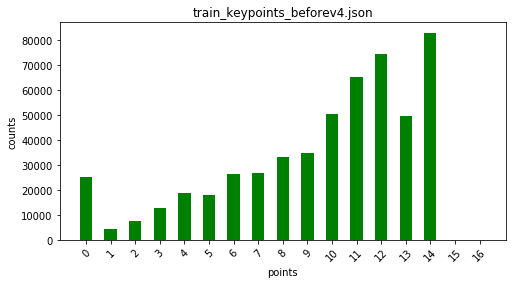

distribution: {'0': 357, '1': 219, '2': 270, '3': 481, '4': 997, '5': 1570, '6': 2272, '7': 2397, '8': 3193, '9': 2894, '10': 4727, '11': 3573, '12': 6349, '13': 3529, '14': 9138, '15': 0, '16': 0}


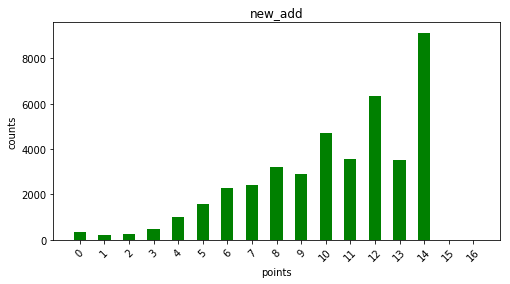

distribution: {'0': 25479, '1': 4669, '2': 7919, '3': 13099, '4': 19899, '5': 19695, '6': 28503, '7': 29365, '8': 36393, '9': 37737, '10': 55298, '11': 69099, '12': 80788, '13': 53296, '14': 92293, '15': 0, '16': 0}


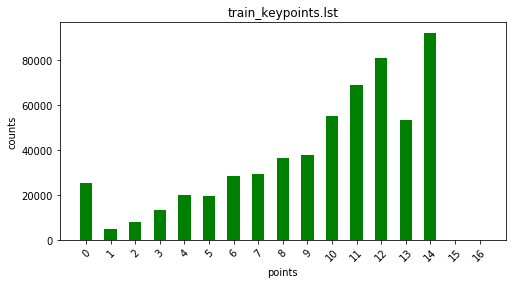

In [10]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

def get_labels(path):
    label_lst = []
    keypoint_scope = ["0","1","2","3", "4", "5", "6", "7", "8", "9", "10", 
               "11", "12", "13", "14", "15", "16"]
    scope_cnt = [0] * 17
    if isinstance(path, list):
        recs = []
        for p in path:
            recs += open(p, "r").readlines()
    else:
        recs = open(path, "r").readlines()
    for line in recs:
        if "points" in line:
            points_avail = int(line.split("\t")[-1])
        else:
            points_avail = line.split(" ")[-1]
        scope_cnt[int(points_avail)] += 1
        label_lst.append(points_avail)
    print("distribution: %s"%dict(zip(keypoint_scope, scope_cnt)))
    return label_lst, keypoint_scope, scope_cnt

def keypoint_distribution(dataset_name, keypoint_scope, scope_cnt):
    plt.figure(figsize=(8,4))
    num_bins = 17
#     n, bins, patches = plt.hist(x, num_bins, normed=False, facecolor = 'blue', alpha = 0.3)
    plt.bar(keypoint_scope, scope_cnt, width=0.5, color="green", align="center")
    plt.xticks(range(len(keypoint_scope)), keypoint_scope, rotation=45)
    plt.xlabel('points')
    plt.ylabel('counts')
    plt.title(dataset_name)
    plt.show()

task="age"
path = ["/world/data-c26/liliang/person_attribute/v4_20190514/lst/%s/source/train_keypoints_beforev4.json"%task,
        ["/world/data-c26/liliang/person_attribute/v4_20190514/lst/%s/source/train_keypoints_v4.json"%task,
        "/world/data-c26/liliang/person_attribute/v4_20190514/lst/%s/source/train_keypoints_v4_2_filtercam.json"%task],
       "/world/data-c26/liliang/person_attribute/v4_20190514/lst/%s/train_keypoints.lst"%task]
for p in path:
    if isinstance(p, list):
        dataset_name = "new_add"
    else:
        dataset_name = p.split("/")[-1]
    label_lst, keypoint_scope, scope_cnt = get_labels(p)
    keypoint_distribution(dataset_name, keypoint_scope, scope_cnt)

## gender distribution

total: 564711
distribution: {'0: man': 243608, '1: wom': 320007, '2: unknown': 1084, '3: muti': 12}


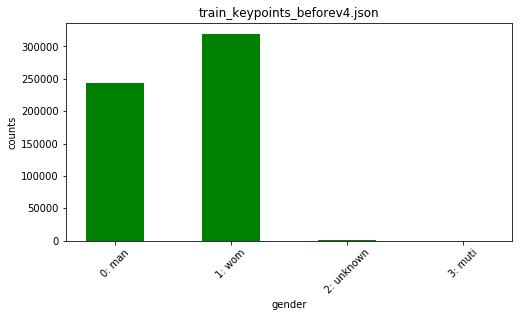

total: 598232
distribution: {'0: man': 263492, '1: wom': 333092, '2: unknown': 1236, '3: muti': 412}


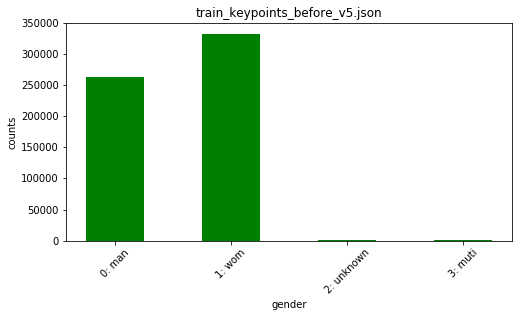

total: 118902
distribution: {'0: man': 43953, '1: wom': 52938, '2: unknown': 8254, '3: muti': 13757}


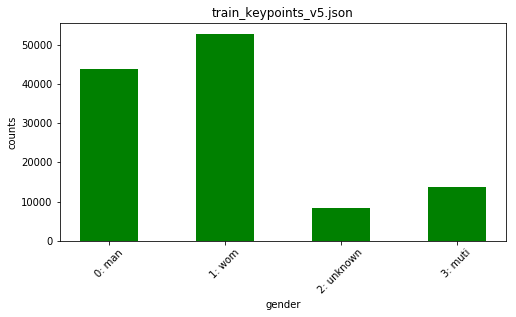

total: 708729
distribution: {'0: man': 303530, '1: wom': 382309, '2: unknown': 9414, '3: muti': 13476}


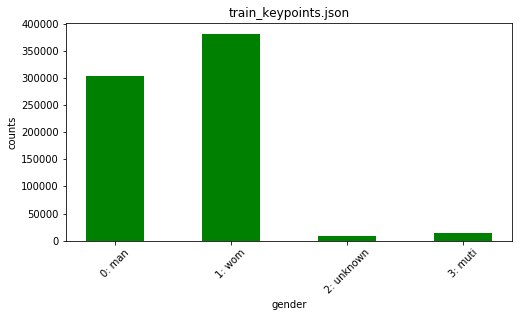

In [13]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

def get_labels(path):
    label_lst = []
    scope = ["0: man", "1: wom", "2: unknown", "3: muti"]
    scope_cnt = [0] * 4
    if isinstance(path, list):
        recs = []
        for p in path:
            recs += open(p, "r").readlines()
    else:
        recs = open(path, "r").readlines()
    for line in recs:
        if "points" in line:
            label = int(line.split("\t")[1])
        else:
            label = int(line.split(" ")[1])
        if int(label)>1:continue # only count male && female
        scope_cnt[label] += 1
        label_lst.append(label)
    print("total: %s"%len(label_lst))
    print("distribution: %s"%dict(zip(scope, scope_cnt)))
    return label_lst, scope, scope_cnt

def distribution(dataset_name, scope, scope_cnt):
    plt.figure(figsize=(8,4))
    num_bins = 4
    plt.bar(scope, scope_cnt, width=0.5, color="green", align="center")
    plt.xticks(range(len(scope)), scope, rotation=45)
    plt.xlabel(task)
    plt.ylabel('counts')
    plt.title(dataset_name)
    plt.show()

task="gender"
path = ["/world/data-c26/liliang/person_attribute/v4_20190514/lst/%s/source/train_keypoints_beforev4.json"%task,
       "/world/data-c26/liliang/person_attribute/v5/lst/%s/source/train_keypoints_before_v5.json"%task,
       "/world/data-c26/liliang/person_attribute/v5/lst/%s/source/train_keypoints_v5.json"%task,
       "/world/data-c26/liliang/person_attribute/v5/lst/%s/train_keypoints.json"%task]
for p in path:
    if isinstance(p, list):
        dataset_name = "new_add" #conbine two jsons
    else:
        dataset_name = p.split("/")[-1]
    label_lst, scope, scope_cnt = get_labels(p)
    distribution(dataset_name, scope, scope_cnt)

## bag distribution

total: 1798694
distribution: {'0: w bag': 988255, '1: w/o bag': 810439}


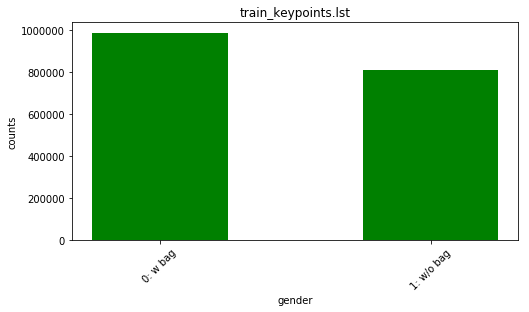

In [12]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

def get_labels(path):
    label_lst = []
    scope = ["0: w bag", "1: w/o bag"]
    scope_cnt = [0] * 2
    if isinstance(path, list):
        recs = []
        for p in path:
            recs += open(p, "r").readlines()
    else:
        recs = open(path, "r").readlines()
    for line in recs:
        if "points" in line:
            label = int(line.split("\t")[1])
        else:
            label = int(line.split(" ")[1])
        if label in [11, 13]:continue
        scope_cnt[label] += 1
        label_lst.append(label)
    print("total: %s"%len(label_lst))
    print("distribution: %s"%dict(zip(scope, scope_cnt)))
    return label_lst, scope, scope_cnt

def distribution(dataset_name, scope, scope_cnt):
    plt.figure(figsize=(8,4))
    num_bins = 2
    plt.bar(scope, scope_cnt, width=0.5, color="green", align="center")
    plt.xticks(range(len(scope)), scope, rotation=45)
    plt.xlabel(task)
    plt.ylabel('counts')
    plt.title(dataset_name)
    plt.show()

task="bag"
path = ["/world/data-c26/liliang/person_attribute/v5/lst/%s/train_keypoints.lst"%task]
for p in path:
    if isinstance(p, list):
        dataset_name = "new_add" #conbine two jsons
    else:
        dataset_name = p.split("/")[-1]
    label_lst, age_scope, scope_cnt = get_labels(p)
    age_distribution(dataset_name, age_scope, scope_cnt)

## orient distribution

total: 1214844
distribution: {'0: back': 161480, '1: front': 91787, '2: left': 193705, '3: right': 166277, '4: left-back': 97244, '5: left-front': 173209, '6: right-back': 121286, '7: right-front': 208303, '8: unknown': 1553}


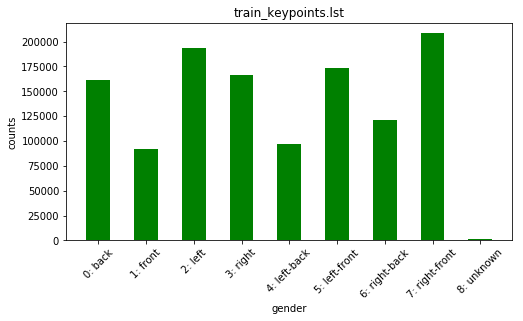

In [11]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

def get_labels(path):
    label_lst = []
    scope = ["0: back", "1: front", "2: left", "3: right", "4: left-back", "5: left-front", 
             "6: right-back", "7: right-front", "8: unknown"]
    scope_cnt = [0] * 9
    if isinstance(path, list):
        recs = []
        for p in path:
            recs += open(p, "r").readlines()
    else:
        recs = open(path, "r").readlines()
    for line in recs:
        if "points" in line:
            label = int(line.split("\t")[1])
        else:
            label = int(line.split(" ")[1])
        if int(label)>7:continue # ignore "unkown"
        scope_cnt[label] += 1
        label_lst.append(label)
    print("total: %s"%len(label_lst))
    print("distribution: %s"%dict(zip(scope, scope_cnt)))
    return label_lst, scope, scope_cnt

def distribution(dataset_name, scope, scope_cnt):
    plt.figure(figsize=(8,4))
    num_bins = 9
    plt.bar(
        scope, scope_cnt, width=0.5, color="green", align="center")
    plt.xticks(range(len(scope)), scope, rotation=45)
    plt.xlabel(task)
    plt.ylabel('counts')
    plt.title(dataset_name)
    plt.show()

task="orient"
path = ["/world/data-c26/liliang/person_attribute/v5/lst/%s/train_keypoints.lst"%task]
for p in path:
    if isinstance(p, list):
        dataset_name = "new_add" #conbine two jsons
    else:
        dataset_name = p.split("/")[-1]
    label_lst, scope, scope_cnt = get_labels(p)
    distribution(dataset_name, scope, scope_cnt)